<a href="https://colab.research.google.com/github/Sanjeevikumar-M/Internship-at-SCT/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/global_traffic_accidents.csv"
df = pd.read_csv(file_path)

# Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Accident ID        10000 non-null  object 
 1   Date               10000 non-null  object 
 2   Time               10000 non-null  object 
 3   Location           10000 non-null  object 
 4   Latitude           10000 non-null  float64
 5   Longitude          10000 non-null  float64
 6   Weather Condition  10000 non-null  object 
 7   Road Condition     10000 non-null  object 
 8   Vehicles Involved  10000 non-null  int64  
 9   Casualties         10000 non-null  int64  
 10  Cause              10000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 859.5+ KB
None


In [87]:
#Display basic info
print(df.columns)

Index(['Accident ID', 'Date', 'Time', 'Location', 'Latitude', 'Longitude',
       'Weather Condition', 'Road Condition', 'Vehicles Involved',
       'Casualties', 'Cause'],
      dtype='object')


In [88]:
#Display basic info
print(df.head().to_string(index=False))

Accident ID       Date  Time          Location   Latitude   Longitude Weather Condition Road Condition  Vehicles Involved  Casualties            Cause
   b0dd6f57 2023-04-19 06:39     Mumbai, India  13.488432  -73.290682              Snow          Snowy                  5           7 Reckless Driving
   debfad09 2023-01-17 02:47 São Paulo, Brazil -37.798317  -32.244242             Clear            Icy                  4           1    Drunk Driving
   6d69aa36 2024-04-09 02:55 Sydney, Australia  33.767869  104.869018              Rain          Snowy                  1           7 Reckless Driving
   425bb1f0 2023-10-10 11:23      Tokyo, Japan  -0.378031 -165.825855             Storm            Wet                  4           0    Drunk Driving
   90d5cf62 2023-01-02 12:07    Beijing, China  41.254879  -30.776959             Storm          Snowy                  3           9 Reckless Driving


In [89]:
import pandas as pd

# Load the dataset
file_path = "/content/global_traffic_accidents.csv"
df = pd.read_csv(file_path)

# Convert 'Date' and 'Time' columns to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.hour  # Extract hour only

# Drop rows with invalid 'Date' values
df.dropna(subset=['Date', 'Time'], inplace=True)

# Combine 'Date' and 'Time' into a single 'DateTime' column
df['DateTime'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time'].astype(str) + ':00', errors='coerce')

# Drop rows with invalid 'DateTime' values
df.dropna(subset=['DateTime'], inplace=True)

# Standardize text columns
df['Weather Condition'] = df['Weather Condition'].str.lower().str.strip()
df['Road Condition'] = df['Road Condition'].str.lower().str.strip()
df['Cause'] = df['Cause'].str.lower().str.strip()

# Verify the DataFrame
print(df[['Date', 'Time', 'DateTime', 'Weather Condition', 'Road Condition', 'Cause']].head().to_string(index=False))

      Date  Time            DateTime Weather Condition Road Condition            Cause
2023-04-19     6 2023-04-19 06:00:00              snow          snowy reckless driving
2023-01-17     2 2023-01-17 02:00:00             clear            icy    drunk driving
2024-04-09     2 2024-04-09 02:00:00              rain          snowy reckless driving
2023-10-10    11 2023-10-10 11:00:00             storm            wet    drunk driving
2023-01-02    12 2023-01-02 12:00:00             storm          snowy reckless driving


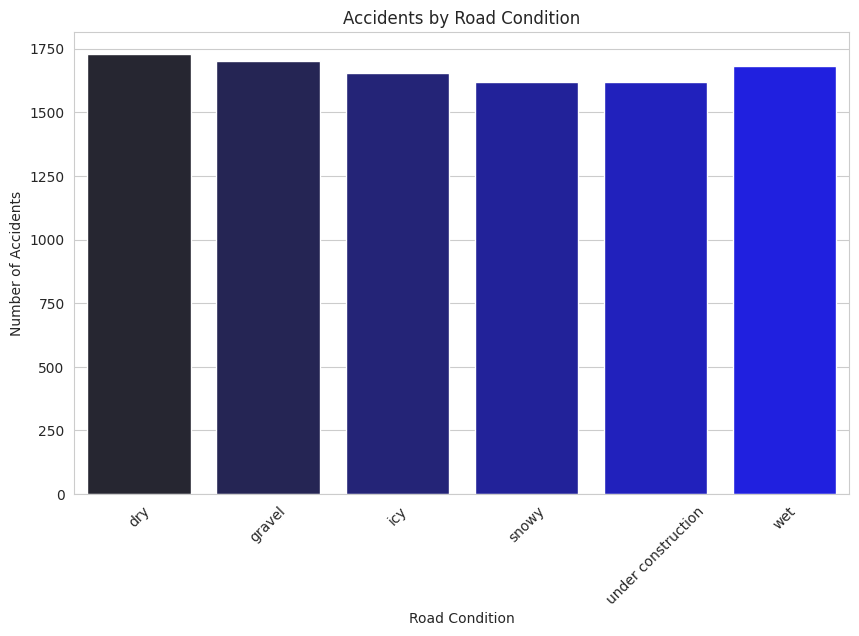

In [90]:
# Group by road condition and count accidents
accidents_by_road = df.groupby('Road Condition').size().reset_index(name='Count')

# Plot accidents by road condition
plt.figure(figsize=(10, 6))
sns.barplot(data=accidents_by_road, x='Road Condition', y='Count', hue='Road Condition', palette='dark:blue', legend=False)
plt.title('Accidents by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

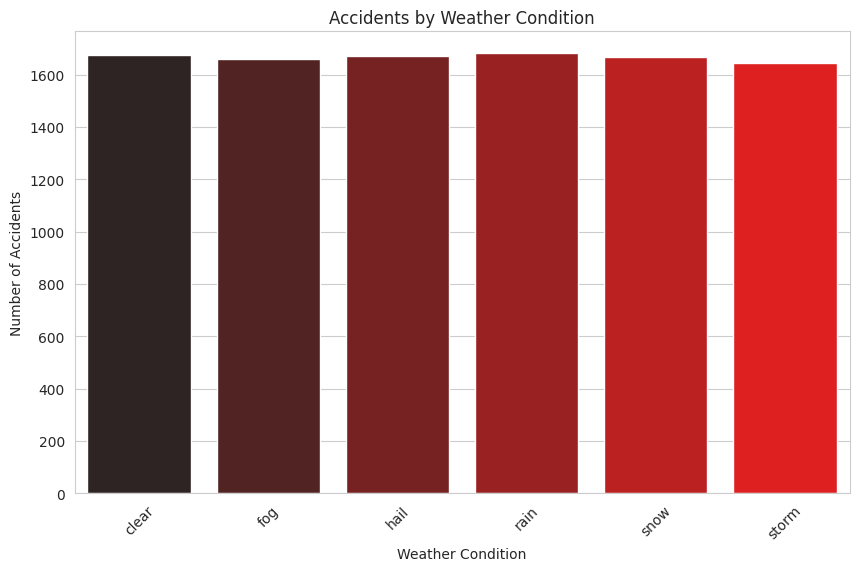

In [91]:
# Group by weather condition and count accidents
accidents_by_weather = df.groupby('Weather Condition').size().reset_index(name='Count')

# Plot accidents by weather condition
plt.figure(figsize=(10, 6))
sns.barplot(data=accidents_by_weather, x='Weather Condition', y='Count', hue='Weather Condition', palette='dark:red', legend=False)
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

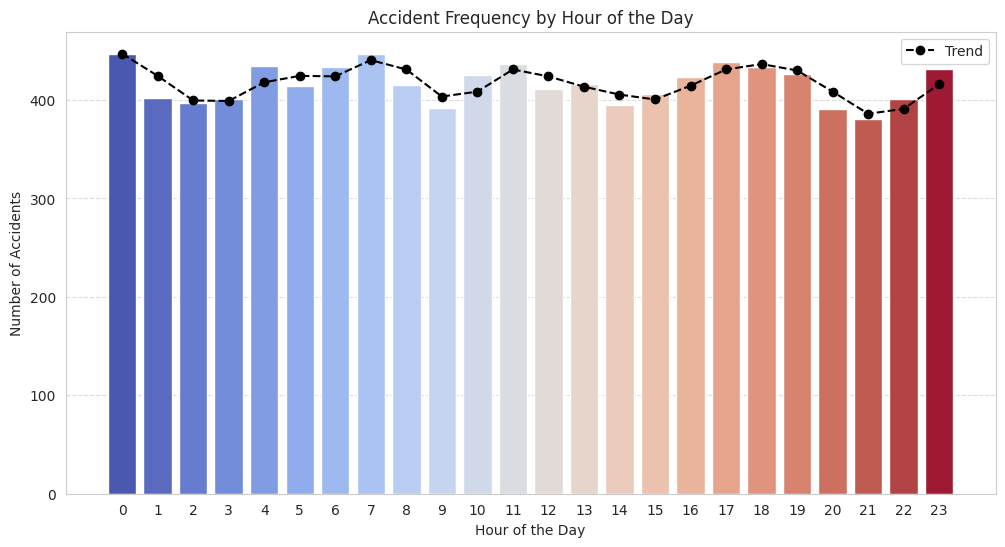

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set seaborn style
sns.set_style("whitegrid")

# Extract hour from 'Time' column (already converted to datetime)
df['Hour'] = df['Time']

# Count accidents per hour
hourly_accidents = df['Hour'].value_counts().sort_index()

# Create figure
plt.figure(figsize=(12, 6))

# Countplot (bar chart)
sns.countplot(x=df['Hour'], hue=df['Hour'], palette="coolwarm", legend=False)

# Trend Line
plt.plot(hourly_accidents.index, hourly_accidents.rolling(window=2, min_periods=1).mean(),
         color='black', marker='o', linestyle='dashed', label='Trend')

# Labels & Formatting
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.title("Accident Frequency by Hour of the Day")
plt.xticks(range(24))  # Ensure all hours (0-23) are shown
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

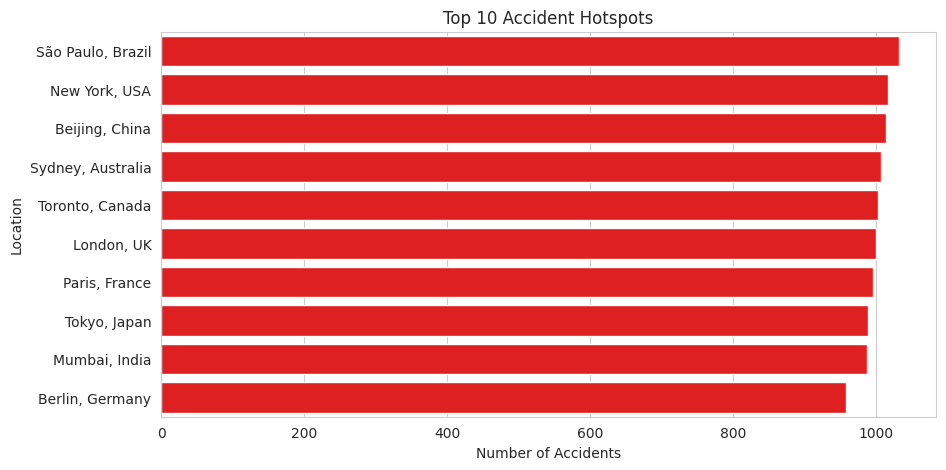

In [93]:
# Get the top 10 accident hotspots
top_hotspots = df['Location'].value_counts().head(10).reset_index()
top_hotspots.columns = ['Location', 'Accident Count']

# Plot the top hotspots
plt.figure(figsize=(10, 5))
sns.barplot(data=top_hotspots, y='Location', x='Accident Count', color='red')
plt.title("Top 10 Accident Hotspots")
plt.xlabel("Number of Accidents")
plt.show()

In [94]:
import folium

# Create a map centered around the mean latitude and longitude
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=5)

# Add points to the map
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=5,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(accident_map)

# Display the map
accident_map

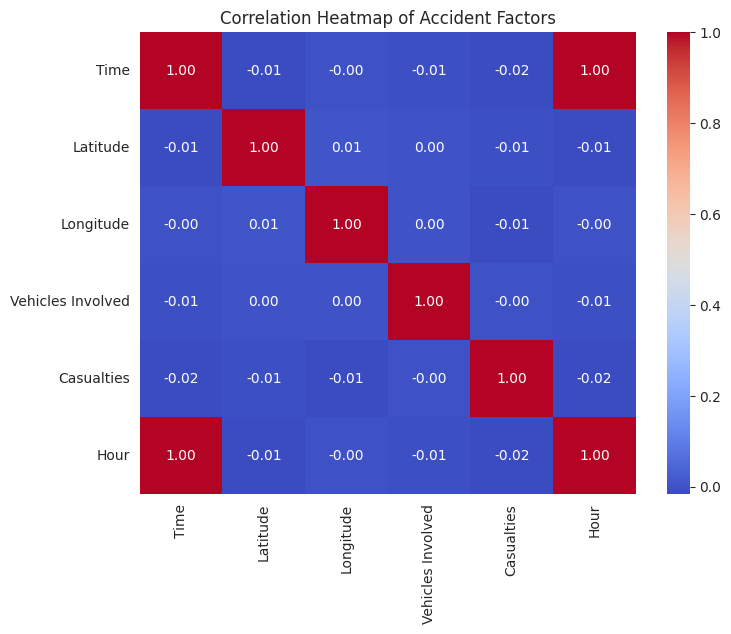

In [95]:
# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Accident Factors")
plt.show()

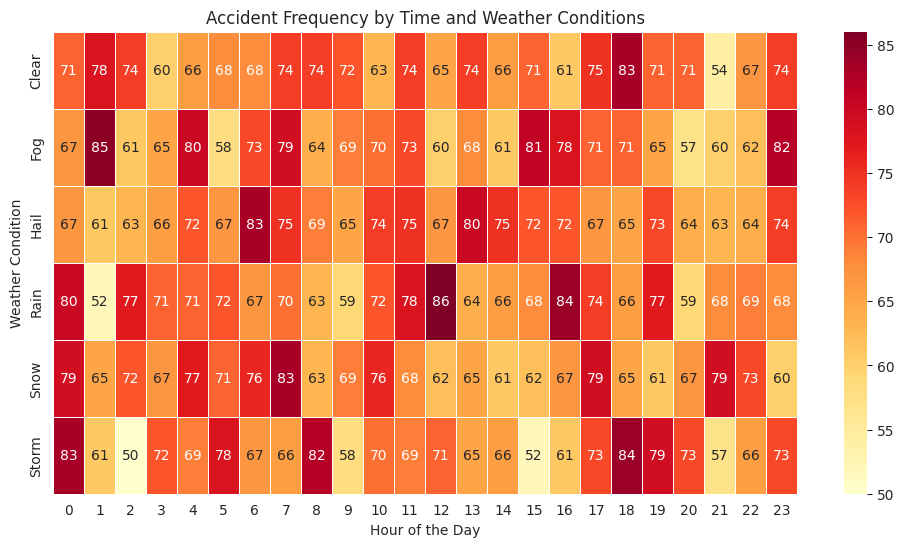

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/global_traffic_accidents.csv"
df = pd.read_csv(file_path)

# Convert 'Time' to datetime and extract the hour
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

# Create a pivot table for heatmap
heatmap_data = df.pivot_table(index='Weather Condition', columns='Time', values='Accident ID', aggfunc='count')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Accident Frequency by Time and Weather Conditions")
plt.xlabel("Hour of the Day")
plt.ylabel("Weather Condition")
plt.show()